In [1]:
import os

import astropy.table as at
from astropy.constants import G
import astropy.units as u
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tqdm.notebook import tqdm
import thejoker as tj
import tables as tb
from scipy.stats import beta, uniform

from gala.mpl_style import laguna, hesperia

from hq.config import Config
from hq.data import get_rvdata

In [2]:
figure_path = '../../tex/figures'
os.makedirs(figure_path, exist_ok=True)

In [3]:
c = Config.from_run_name('dr16-random')
alldata, allvisit = c.load_alldata()

In [4]:
# gold = at.QTable.read('../../catalogs/gold_sample.fits')
# bimodal = at.QTable.read('../../catalogs/bimodal.fits')
# bimodal = at.QTable(bimodal[bimodal['LOGG'] > -0.5], masked=False)

In [5]:
ab_samples = at.Table.read('../../data/ecc_ab_samples.csv')

In [6]:
r'{:.3f} \pm {:.3f}'.format(np.mean(ab_samples['a']), 
                            np.std(ab_samples['a']))

'1.749 \\pm 0.001'

In [7]:
r'{:.3f} \pm {:.3f}'.format(np.mean(ab_samples['b']), 
                            np.std(ab_samples['b']))

'2.008 \\pm 0.001'

In [8]:
kipping_beta = beta(0.867, 3.03)

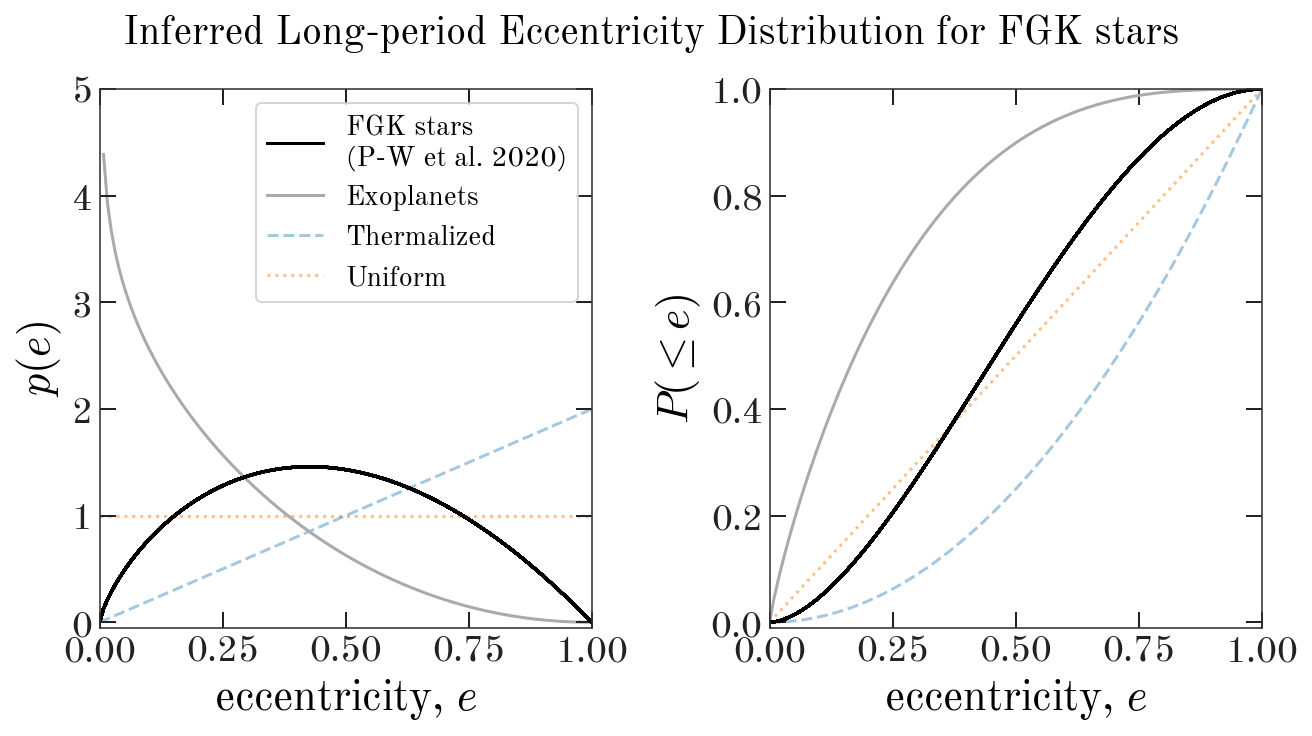

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(9, 5), 
                         sharex=True, constrained_layout=True)

egrid = np.linspace(0, 1, 128)

ax = axes[0]

for row in np.random.choice(ab_samples, size=256, replace=False):
    ax.plot(egrid, beta.pdf(egrid, row[0], row[1]), 
            marker='', color='k', alpha=0.2)
ax.plot(egrid, beta.pdf(egrid, row[0], row[1]), 
        marker='', color='k', alpha=1, 
        label='FGK stars\n(P-W et al. 2020)')

ax.plot(egrid, kipping_beta.pdf(egrid), 
        marker='', color='#aaaaaa', zorder=-5, 
        label='Exoplanets')

ax.plot(egrid, 2*egrid, 
        marker='', color='tab:blue', linestyle='--', 
        alpha=0.4, zorder=-10, label='Thermalized')

ax.plot(egrid, uniform(0,1).pdf(egrid),
        marker='', linestyle=':', color='tab:orange', 
        alpha=0.5, zorder=-100, label='Uniform')

ax.set_xlim(0, 1)
ax.set_ylim(-0.05, 5)

ax.legend(loc='upper right', fontsize=14)

ax.set_xlabel('eccentricity, $e$')
ax.set_ylabel('$p(e)$')


# ----------------------------

ax = axes[1]
ax.plot(egrid, kipping_beta.cdf(egrid), marker='', color='#aaaaaa')

for row in np.random.choice(ab_samples, size=256, replace=False):
    ax.plot(egrid, beta.cdf(egrid, row[0], row[1]), 
            marker='', color='k', alpha=0.2)
    
ax.plot(egrid, egrid**2, 
        marker='', color='tab:blue', linestyle='--', 
        alpha=0.4, zorder=-10)

ax.plot(egrid, uniform(0,1).cdf(egrid),
        marker='', linestyle=':', color='tab:orange', 
        alpha=0.5, zorder=-100)

ax.set_xlim(0, 1)
ax.set_ylim(-0.01, 1)

ax.set_xlabel('eccentricity, $e$')
ax.set_ylabel(r'$P(\leq e)$')

fig.suptitle("Inferred Long-period Eccentricity Distribution for FGK stars ", 
             fontsize=20)

fig.set_facecolor('w')

fig.savefig(os.path.join(figure_path, 'eccentricity-distr.pdf'))